## Overview of Dataset

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

- name
- year
- selling_price
- km_driven
- fuel
- seller_type
- transmission
- Owner

## Dataset
Vehicle dataset: Used Cars data form websites<br>
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv

## Step 01: Import all the required Libraries

Let's load the necessary libraries and data and start coding.

- <strong>NumPy</strong> : stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.
- <strong>Pandas</strong> : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- <strong>Sklearn</strong> : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- <strong>Pickle</strong> : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- <strong>Matplotlib</strong> : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- <strong>Seaborn</strong> : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, Lasso, LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## Step 02: Read all the required Data
In this stage we are going to read our problem dataset and have a look on it.

In [2]:
# Loading the data into pandas dataframe
try: 
    data = pd.read_csv('Data/CAR DETAILS FROM CAR DEKHO.csv')
    print("Data Reading Done Successfully....")
    
except (FileNotFoundError, IOError):
    print("Wrong File or File path")

Data Reading Done Successfully....


In [3]:
# Checking the first five rows of the data
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# Checking the last five rows of the data
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


### Data Exploration
In this stage, we explore the data with different techniques..

In [5]:
# Checking the rows and columns of the dataset
print(f"The number of rows are {data.shape[0]} and the number of columns are {data.shape[1]}")

The number of rows are 4340 and the number of columns are 8


In [6]:
# Getting more insights of the data using .info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
# Statistic of the dataset
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


#### Let's check if the data set has any missing values.

In [8]:
# Chcek Missing values
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

As we can see there is no missing value present in the dataset

#### Let's proceed and check the distribution of the target variable.

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

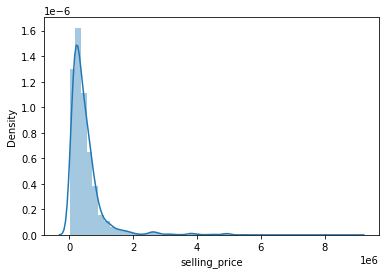

In [9]:
#SalePrice
sns.distplot(data['selling_price'])

We see that the target variable selling price has a right-skewed distribution. We'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables.

In [10]:
#skewness
print(f"The skewness of selling-price is {data.selling_price.skew()}")

The skewness of selling-price is 4.892021472306356


Skewness is 0.06016301220961387


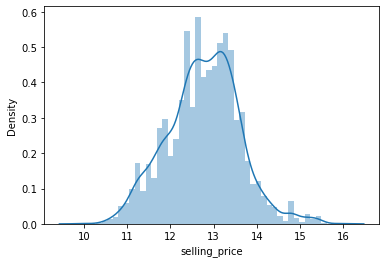

In [11]:
#now transforming the target variable
target = np.log(data.selling_price)
data['selling_price'] = target
print ('Skewness is', target.skew())
sns.distplot(target)
plt.show()

As we saw, log transformation of the target variable has helped us fixing its skewed distribution and the new distribution looks closer to normal.

In [12]:
# Chcek how many numerical and categorical feature present
numeric_data = data[data.dtypes[(data.dtypes == 'int64') | (data.dtypes == 'float64')].index]
categorical_data = data[data.dtypes[data.dtypes == 'object'].index]
print (f"There are {numeric_data.shape[1]} numeric and {categorical_data.shape[1]} categorical columns in dataset.")

There are 3 numeric and 5 categorical columns in dataset.


#### Lets explore the numeric data.....

In [13]:
numeric_data.head()

,year,selling_price,km_driven
0,2007,11.002100,70000
1,2007,11.813030,50000
2,2012,13.304685,100000
3,2017,12.429216,46000
4,2014,13.017003,141000


selling_price    1.000000
year             0.695723
km_driven       -0.242700
Name: selling_price, dtype: float64


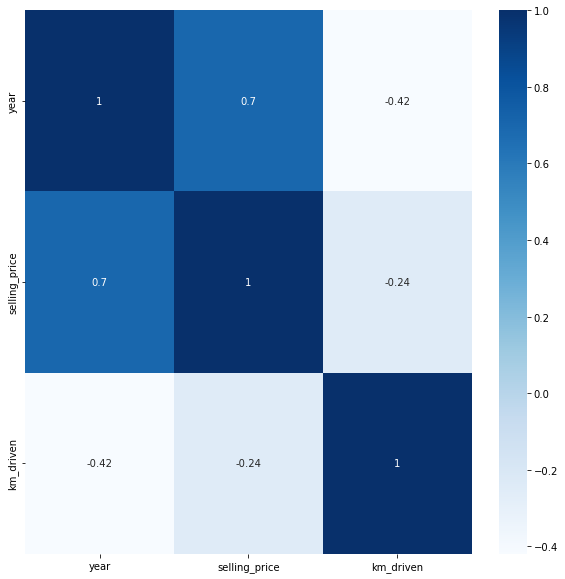

In [14]:
# Correlation map to check multicolinearity
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
print(corr['selling_price'].sort_values(ascending=False))

Here we can see that year is positively correlated with the target feature i.e. selling-price whereas the km-driven is negetive correlated with the target feature i.e. selling-price which means if the yaer is near to the todays time then the selling-price is also high and if the car is less km driven then the selling-price is high otherwise low.

<AxesSubplot:xlabel='year', ylabel='count'>

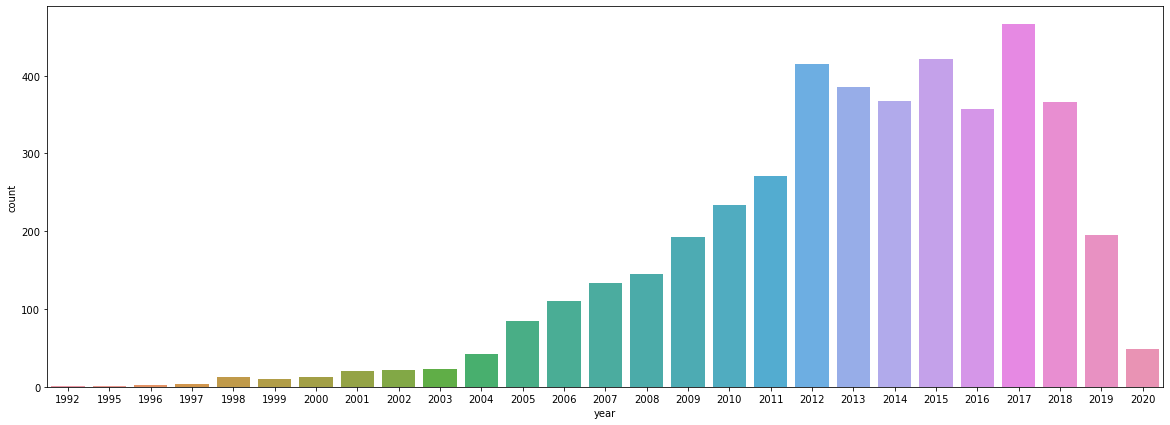

In [15]:
# Ploting the car data yearly
plt.figure(figsize=(20,7))
sns.countplot(x='year', data=numeric_data)

Here we can see that of the cars are of 2018 model and then 2015 and so on..

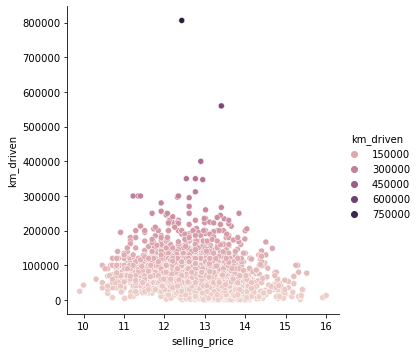

In [16]:
# Ploting the selling price vs km driven
sns.relplot(x='selling_price', y='km_driven', data=data, hue='km_driven')

Here km_driven and the selling_price has inversely proportional with each other because lower the km driven, higher the selling_price and higher the km_driven, lower the selling_price.

<AxesSubplot:xlabel='selling_price', ylabel='year'>

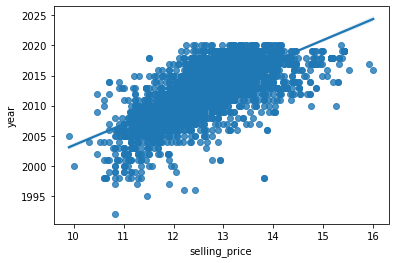

In [17]:
# Ploting the selling price vs year
sns.regplot(x='selling_price', y='year', data=data)

Here year and the selling_price has directly proportional with each other because lower the km driven, lower the selling_price and higher the km_driven, higher the selling_price.

#### Chceking for outliers....

<AxesSubplot:ylabel='km_driven'>

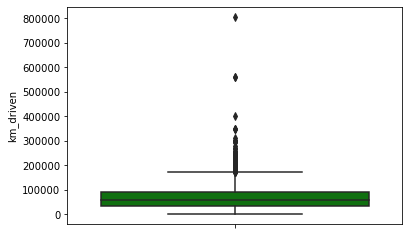

In [18]:
sns.boxplot(y='km_driven', data=data, color='g')

<AxesSubplot:ylabel='year'>

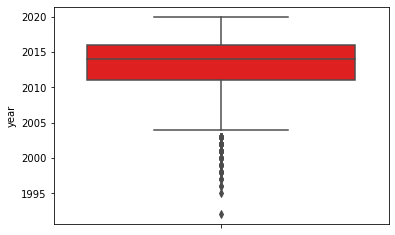

In [19]:
sns.boxplot(y='year', data=data, color='r')

<AxesSubplot:ylabel='selling_price'>

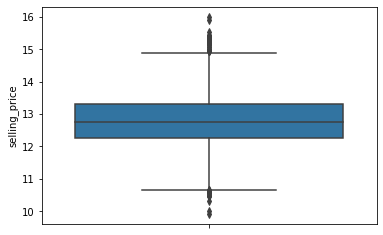

In [20]:
sns.boxplot(y='selling_price', data=data)

As we can see that there are outliers in the km_driven and selling_price feature so first remove these outliers.

#### Lets explore the categorical data.....

In [21]:
categorical_data.head()

,name,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Diesel,Individual,Manual,Second Owner


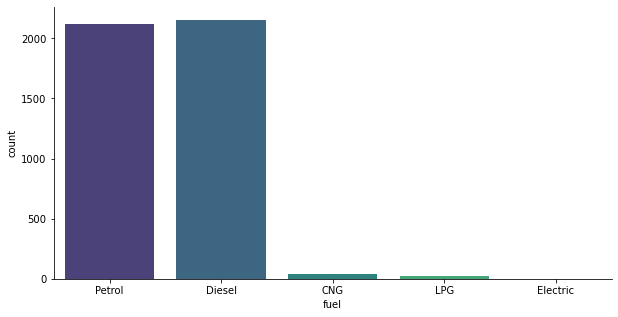

In [22]:
# Ploting Fuel Data
plt.figure(figsize=(10,5))
sns.countplot(x='fuel', data=categorical_data, palette='viridis')
sns.despine()

Most of the cars are of Petrol and Diesel type.

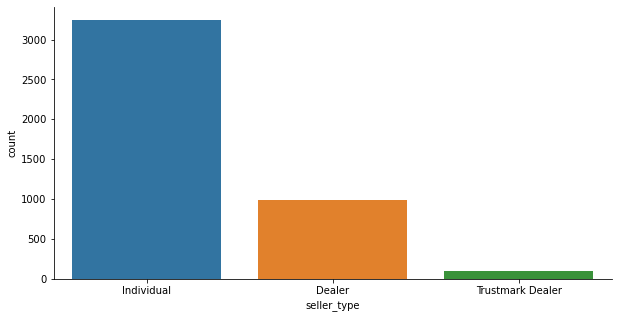

In [23]:
# Ploting Seller Type
plt.figure(figsize=(10,5))
sns.countplot(x='seller_type', data=categorical_data)
sns.despine()

Most of the seller are individual and then other are dealer.

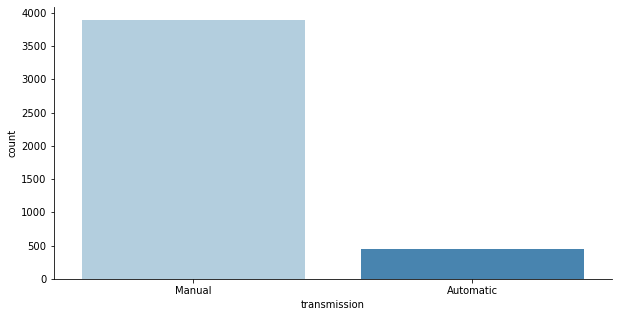

In [24]:
# Ploting Transmission Data
plt.figure(figsize=(10,5))
sns.countplot(x='transmission', data=categorical_data, palette='Blues')
sns.despine()

Most of the Transmission is Manual.

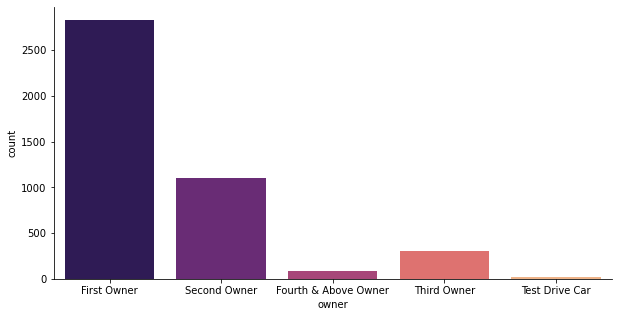

In [25]:
# Ploting Owner Data
plt.figure(figsize=(10,5))
sns.countplot(x='owner', data=categorical_data, palette='magma')
sns.despine()

Most of the owners are first and second owners.

## Step 04: Data Pre-Processing
Make data ready for Machine Learning model...

In [26]:
# Function to detect outliers
def outlier_detection(feature):
    Q1, Q3 = np.percentile(data[feature], [25, 75])
    IQR = Q3 - Q1
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)
    return lower_fence, upper_fence

In [27]:
# Calculating the lower and Upper fence
selling_price_lower_fence, selling_price_upper_fence = outlier_detection('selling_price')
km_driven_lower_fence, km_driven_upper_fence = outlier_detection('km_driven')
year_lower_fence, year_upper_fence = outlier_detection('year')

In [28]:
# Removing the outlier in selling_price
data.loc[data['selling_price']<=selling_price_lower_fence,'selling_price']=selling_price_lower_fence
data.loc[data['selling_price']>=selling_price_upper_fence,'selling_price']=selling_price_upper_fence

In [29]:
# Removing the outlier in km_driven
data.loc[data['km_driven']>=km_driven_upper_fence,'km_driven']=km_driven_upper_fence

In [30]:
# Removing the outlier in year
data.loc[data['year']<=year_lower_fence,'year']=year_lower_fence

<AxesSubplot:ylabel='km_driven'>

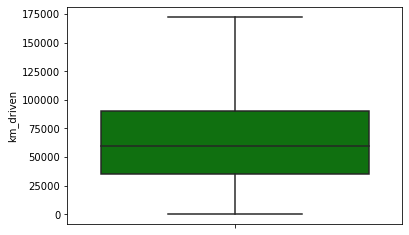

In [31]:
sns.boxplot(y='km_driven', data=data, color='g')

<AxesSubplot:ylabel='selling_price'>

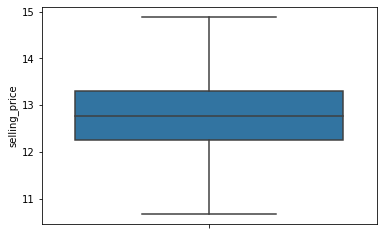

In [32]:
sns.boxplot(y='selling_price', data=data)

<AxesSubplot:ylabel='year'>

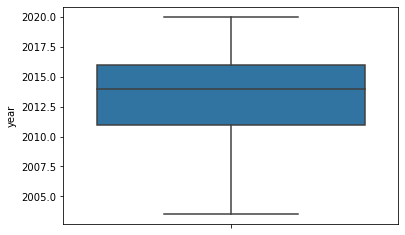

In [33]:
sns.boxplot(y='year', data=data)

Here is not outliers in any column.

In [34]:
# Function to encode varibles
def encoding_categorical_feature(*args):
    for feature in args:
        encoded = pd.get_dummies(categorical_data[feature], drop_first=True)
        return pd.concat([data, encoded], axis=1)

In [35]:
data = encoding_categorical_feature(['fuel', 'seller_type', 'transmission', 'owner'])

In [36]:
# Encoded Data
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007.0,11.002100,70000,Petrol,Individual,Manual,First Owner,0,0,0,1,1,0,1,0,0,0,0
1,Maruti Wagon R LXI Minor,2007.0,11.813030,50000,Petrol,Individual,Manual,First Owner,0,0,0,1,1,0,1,0,0,0,0
2,Hyundai Verna 1.6 SX,2012.0,13.304685,100000,Diesel,Individual,Manual,First Owner,1,0,0,0,1,0,1,0,0,0,0
3,Datsun RediGO T Option,2017.0,12.429216,46000,Petrol,Individual,Manual,First Owner,0,0,0,1,1,0,1,0,0,0,0
4,Honda Amaze VX i-DTEC,2014.0,13.017003,141000,Diesel,Individual,Manual,Second Owner,1,0,0,0,1,0,1,0,1,0,0


In [37]:
# Drop the unnecessary columns
data.drop(columns=['name','fuel', 'seller_type', 'transmission', 'owner'], inplace=True)

In [38]:
# Separate the other features and the target fetaures
X = data.drop(columns=['selling_price'])
y = data['selling_price']

In [39]:
X.head()

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007.0,70000,0,0,0,1,1,0,1,0,0,0,0
1,2007.0,50000,0,0,0,1,1,0,1,0,0,0,0
2,2012.0,100000,1,0,0,0,1,0,1,0,0,0,0
3,2017.0,46000,0,0,0,1,1,0,1,0,0,0,0
4,2014.0,141000,1,0,0,0,1,0,1,0,1,0,0


In [40]:
y.head()

0    11.002100
1    11.813030
2    13.304685
3    12.429216
4    13.017003
Name: selling_price, dtype: float64

In [41]:
# Scale the data to the same range
scaler = StandardScaler()

In [42]:
X_scaled = scaler.fit_transform(X)

In [43]:
X_scaled

array([[-1.53404032,  0.13277834, -0.99219635, ..., -0.58480026,
        -0.06270928, -0.27444872],
       [-1.53404032, -0.36936404, -0.99219635, ..., -0.58480026,
        -0.06270928, -0.27444872],
       [-0.28888238,  0.88599191,  1.00786503, ..., -0.58480026,
        -0.06270928, -0.27444872],
       ...,
       [-1.03597715,  0.45917089, -0.99219635, ...,  1.70998557,
        -0.06270928, -0.27444872],
       [ 0.70724397,  0.63492072,  1.00786503, ..., -0.58480026,
        -0.06270928, -0.27444872],
       [ 0.70724397, -0.62043523, -0.99219635, ..., -0.58480026,
        -0.06270928, -0.27444872]])

## Step 5: Split the data into train and test set
- Now our data is ready to feed to the program. But here we'll split the data into train and test dataset so that after training the model we can test the model on the test dataset and find out how accurate are its predictions.
- Here we are splitting the data so that the training dataset contains 80% of the data and the test dataset contains 20% of the total data.
- Here we are using the train_test_split method from the sklearn library. We'll train our model on x_train and y_train, test it on x_test and y_test.

- test_size: Here we specify the size we want for our test dataset.

- random_state: When we use a random number generator for number or sequence generation, we give a starting number (AKA seed). When we provide the same seed, every time it’ll generate the same sequence as the first one. That’s why to keep the same random values every time, we give seed as random_state in train_test_split().

In [44]:
# Splitting the dataset into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=232)

In [45]:
#display the shapes of the x and y train and test dataset.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3689, 13) (651, 13) (3689,) (651,)


## Step 6: Train the Model using Linear Regression 

In [46]:
# Creating the instance of the Linear regression
lassocv = LassoCV(cv=10, max_iter=200000, normalize=True)
lassocv.fit(X_train, y_train)
alpha = lassocv.alpha_
lasso = Lasso(alpha=alpha)

In [47]:
# Train the model
lasso.fit(X_train, y_train)
print("Training is done successfully..")

Training is done successfully..


In [48]:
# Tesing the accuracy score of the model
print(f"The accuracy score of the model is: {round(lasso.score(X_test, y_test), 2)*100}%")

The accuracy score of the model is: 72.0%


In [49]:
# make prediction on test data
y_pred = lasso.predict(X_test)
y_pred

array([11.55198025, 13.61916553, 13.15330675, 13.13451519, 12.97089702,
       12.37090893, 13.23426428, 12.99023978, 13.27370999, 12.32218056,
       11.7786274 , 11.50835501, 12.41946644, 13.25491843, 12.58826543,
       12.03351223, 12.87502033, 13.65052679, 12.7152024 , 12.48442601,
       13.50394608, 13.63031878, 12.42488525, 13.3453529 , 11.39063175,
       11.60454734, 14.52245072, 12.426535  , 12.86795176, 12.0293814 ,
       12.87722588, 12.66154767, 11.20334466, 12.89273675, 11.26310545,
       11.93481609, 13.50394608, 12.20956042, 13.49774983, 12.39982474,
       13.13232585, 12.90306382, 12.52392548, 14.03885334, 12.87208259,
       12.61203796, 12.44354245, 12.15166942, 13.06669631, 12.87887821,
       12.0169889 , 11.84737874, 12.20956042, 12.88755296, 13.04451529,
       13.6428798 , 11.43143687, 11.78654999, 12.74033982, 12.88548754,
       13.6382384 , 11.14784065, 12.77026809, 12.23641082, 11.31621742,
       12.76613726, 12.90409032, 13.09313287, 12.36402277, 13.32

In [50]:
# Saving the result
result = pd.DataFrame({'y_test':np.array(y_test).reshape(len(y_test)), 'y_pred':y_pred}, index=range(len(y_pred)))
result.y_pred = result.y_pred.apply(lambda x: round(x**2,1))
result.y_test = result.y_test.apply(lambda x: round(x**2,1))
result.to_csv('Car Price prediction model result.csv')

## Step 7: Save the model in a pickle file
As model is giving very good accuracy we'll go with it and save it to pickle file. We save our model to pickle files so that when we want to perform predictions on unseen data, we don't have to train our model again. Any object in python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream.`

In [52]:
# Save the model to disk
pickle.dump(lasso, open('Car Price Prediction model.pickle', 'wb'))

## Summary
Now our model is ready and whenever we need to make prediction, we just load the model using pickle and make the predictions.